In [4]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

import pickle

import torch

import nodegam
from nodegam.vis_utils import vis_GAM_effects
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'

os.chdir('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=0


In [5]:
all_dfs = {}
for model in ['ga2m', 'gam', 'ebm', 'spline']:
    if model not in all_dfs:
        all_dfs[model] = []
    for fold in range(5):
        with open(f'resources/best_dfs/bikeshare_{model}_f{fold}.pkl', 'rb') as fp:
            all_dfs[model].append(pickle.load(fp))

    all_dfs[model] = nodegam.utils.average_GAM_dfs(all_dfs[model])

In [6]:
all_dfs['ga2m'].head()

,feat_name,feat_idx,x,y,y_std,counts,importance
0,offset,-1,None,[188.0624243955452],[1.0276432421074186],None,188.062424
1,season,0,"[1, 2, 3, 4]","[-33.52264201668278, -2.3265632366845934, 5.54...","[1.2949176578072288, 1.3173775718395433, 0.935...","[4242, 4409, 4496, 4232]",17.545413
2,yr,1,"[0, 1]","[-41.194834462549636, 41.17528039738787]","[0.4394025318613898, 0.19285292076277166]","[8645, 8734]",41.185007
3,mnth,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[-13.901499766554263, -4.335122908612569, 1.54...","[1.370373533629814, 1.0407802843775666, 0.8787...","[1429, 1341, 1473, 1437, 1488, 1440, 1488, 147...",7.603441
4,hr,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-126.63473514395866, -143.18371052774725, -15...","[2.0821698180412342, 1.0060036764132547, 1.737...","[726, 724, 715, 697, 697, 717, 725, 727, 727, ...",97.870802


All main effects

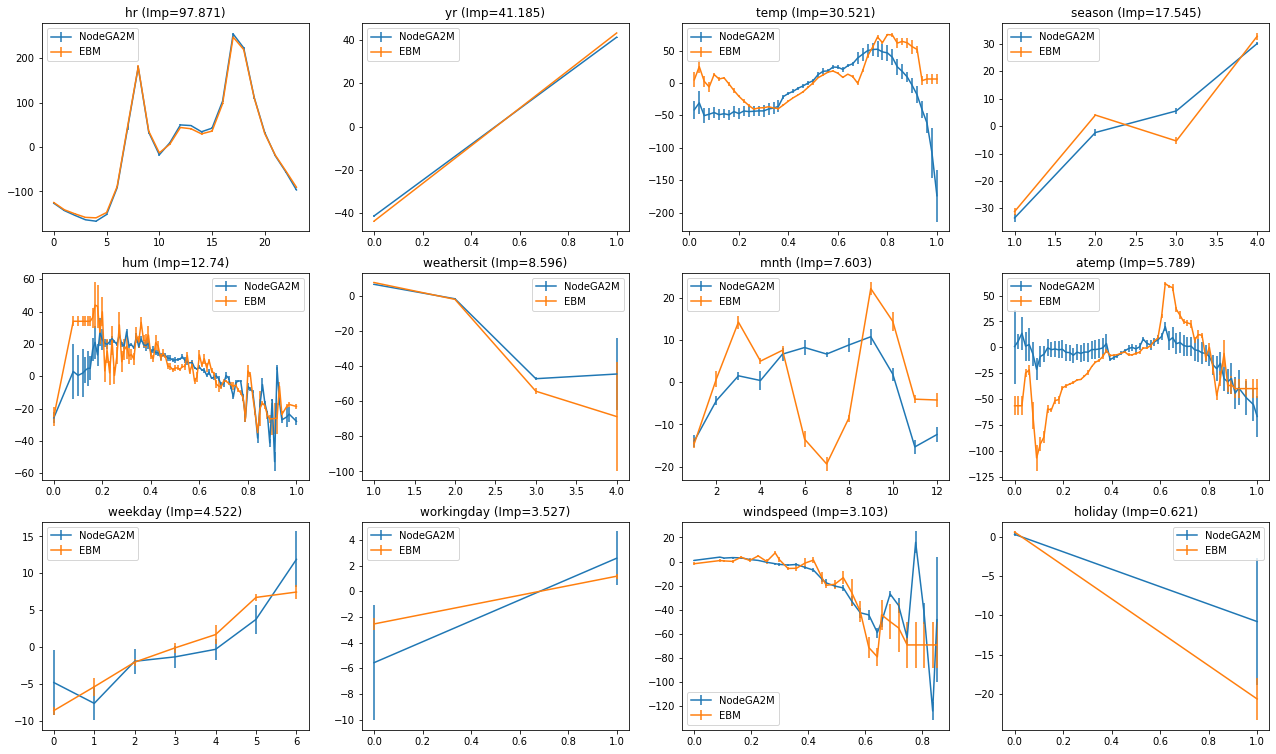

In [22]:
fig, ax = vis_GAM_effects(all_dfs, model_names=['ga2m', 'ebm'], top_interactions=0, sort_by_imp=True)

for a in ax.flat:
    a.legend(['NodeGA2M', 'EBM'])

In [23]:
fig.savefig('resources/images/example_bikeshare_main.png', dpi=300, bbox_inches='tight')

Top 8 interactions

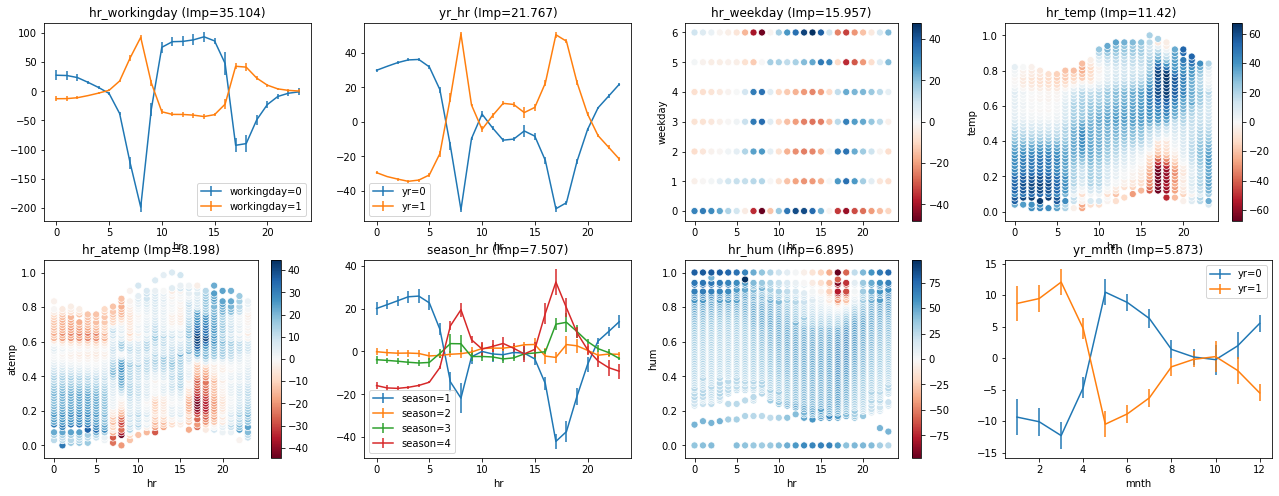

In [9]:
fig, ax = vis_GAM_effects({'NODE-GA2M': all_dfs['ga2m']}, top_interactions=8, only_interactions=True)